In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 50)
from scipy.spatial import cKDTree
from math import *
np.random.seed(123)
import urllib.request
import urllib, os

In [2]:
import pandas as pd
import xarray as xr
import math
from datetime import date, timedelta
from dateutil.relativedelta import relativedelta

In [3]:
import numpy as np
import xarray as xr
import xesmf as xe

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [28]:
ds = xr.open_dataset(r'/home/shubham/ugp/cleaned/zos_AVISO.nc')

In [29]:
ds

<xarray.Dataset>
Dimensions:    (time: 219, bnds: 2, lat: 180, lon: 360)
Coordinates:
  * time       (time) datetime64[ns] 1992-10-16T12:00:00 ... 2010-12-16T12:00:00
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    zos        (time, lat, lon) float32 ...
Attributes: (12/28)
    institution:         Centre National d'Etudes Spatiales
    institute_id:        CNES
    experiment_id:       obs
    source:              SSALTO/DUACS
    model_id:            Obs-AVISO
    contact:             AVISO User Service, aviso@oceanobs.com
    ...                  ...
    Conventions:         CF-1.4
    project_id:          obs4MIPs
    table_id:            Table Omon_obs (31 January 2011) 3852a2b3aff8bddd40f...
    title:               Obs-AVISO model output prepared for obs4MIPs NASA-JP...
    modeling_realm:      ocean
    cmor_version:        2.5.3

In [22]:
month_length = ds.time.dt.days_in_month
month_length

<xarray.DataArray 'days_in_month' (time: 219)>
array([31, 30, 31, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 28,
       31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31, 30, 31,
       31, 30, 31, 30, 31, 31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31,
       31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31,
       30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31,
       30, 31, 31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 28, 31,
       30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31, 30, 31, 31,
       30, 31, 30, 31, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31,
       29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31, 30,
       31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30,
       31, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 29, 31, 30,
       31, 30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31, 30, 31, 31, 30,
       31, 30, 31, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31])
Coordinates:
  * time     (time) datetime64[ns] 1992-10-16T12:00:00 ... 2010-12-16T12:00:00

In [32]:
ds = ds.drop(['time_bnds', 'lat_bnds', 'lon_bnds'])

In [33]:
ds

<xarray.Dataset>
Dimensions:  (time: 219, lat: 180, lon: 360)
Coordinates:
  * time     (time) datetime64[ns] 1992-10-16T12:00:00 ... 2010-12-16T12:00:00
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
Data variables:
    zos      (time, lat, lon) float32 ...
Attributes: (12/28)
    institution:         Centre National d'Etudes Spatiales
    institute_id:        CNES
    experiment_id:       obs
    source:              SSALTO/DUACS
    model_id:            Obs-AVISO
    contact:             AVISO User Service, aviso@oceanobs.com
    ...                  ...
    Conventions:         CF-1.4
    project_id:          obs4MIPs
    table_id:            Table Omon_obs (31 January 2011) 3852a2b3aff8bddd40f...
    title:               Obs-AVISO model output prepared for obs4MIPs NASA-JP...
    modeling_realm:      ocean
    cmor_version:        2.5.3

In [34]:
# Calculate the weights by grouping by 'time.season'.
weights = (
    month_length.groupby("time.season") / month_length.groupby("time.season").sum()
)

# Test that the sum of the weights for each season is 1.0
np.testing.assert_allclose(weights.groupby("time.season").sum().values, np.ones(4))

# Calculate the weighted average
ds_weighted = (ds * weights).groupby("time.season").sum(dim="time")

In [35]:
ds_weighted

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, season: 4)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    zos      (season, lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

In [36]:
# only used for comparisons
ds_unweighted = ds.groupby("time.season").mean("time")
ds_diff = ds_weighted - ds_unweighted

Text(0.5, 1.02, 'Sea surface height (m)')

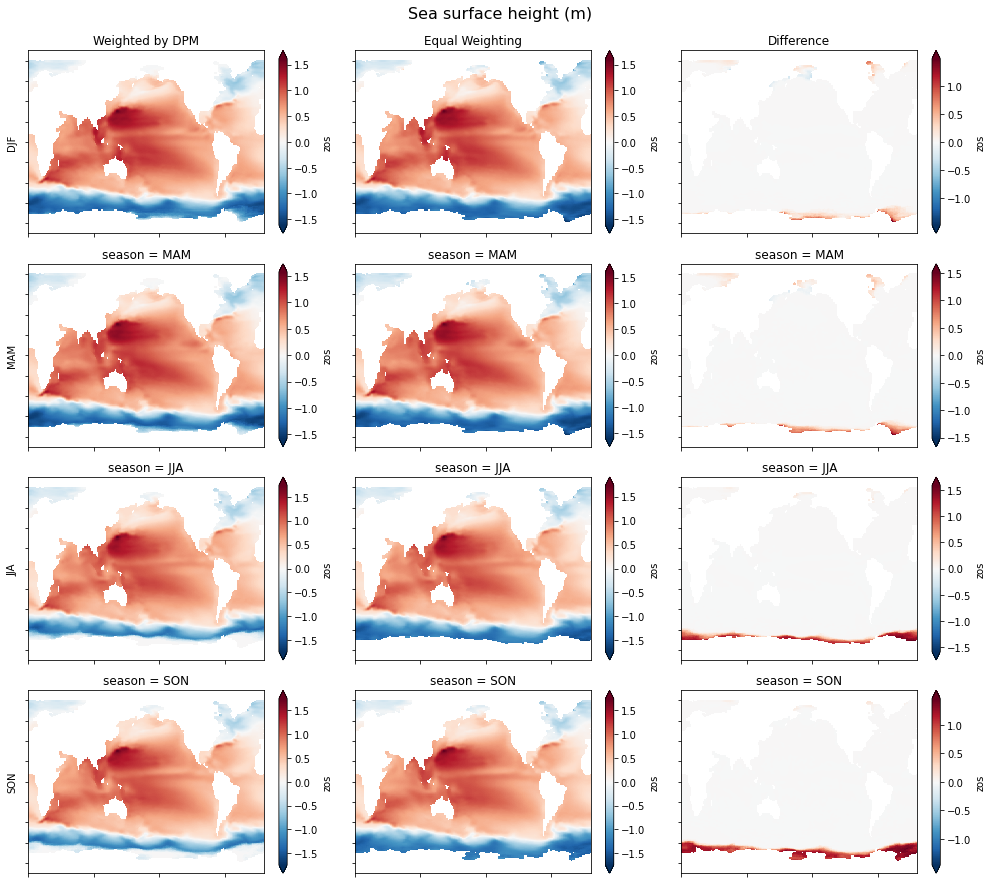

In [42]:
# Quick plot to show the results
notnull = pd.notnull(ds_unweighted["zos"][0])

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12))
for i, season in enumerate(("DJF", "MAM", "JJA", "SON")):
    ds_weighted["zos"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 0],
        cmap="RdBu_r",
        add_colorbar=True,
        extend="both",
    )

    ds_unweighted["zos"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 1],
        cmap="RdBu_r",
        add_colorbar=True,
        extend="both",
    )

    ds_diff["zos"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 2],
        cmap="RdBu_r",
        add_colorbar=True,
        extend="both",
    )

    axes[i, 0].set_ylabel(season)
    axes[i, 1].set_ylabel("")
    axes[i, 2].set_ylabel("")

for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis("tight")
    ax.set_xlabel("")

axes[0, 0].set_title("Weighted by DPM")
axes[0, 1].set_title("Equal Weighting")
axes[0, 2].set_title("Difference")

plt.tight_layout()

fig.suptitle("Sea surface height (m)", fontsize=16, y=1.02)

In [43]:
fig.savefig('seasonal_ssh.png')